In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
cd /content/drive/My Drive

/content/drive/My Drive


In [0]:
!pip install pydicom

     |████████████████████████████████| 35.5MB 89kB/s 


In [0]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
%tensorflow_version 2.x
import tensorflow as tf
import timeit

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)
  
# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):
3.8597017629999755
GPU (s):
0.19035827900006552
GPU speedup over CPU: 20x


In [0]:
# dataset preparation for segmentation
#%% Training  file
# Run this cell if running this notebook for the first time
#!pip install -U --pre segmentation-models --user 
#!conda install -c conda-forge albumentations
import os
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
# Name experiment
experiment_name = "exp-1"

# Import libs
import os 
import time
import cv2
from tqdm import tqdm
import numpy as np
import skimage.draw
import random
import keras
import matplotlib.pyplot as plt
import matplotlib.colors
import scipy.io as sio
from PIL import Image
import scipy
import scipy.ndimage
import keras.backend as K
#import segmentation_models as sm
import numpy as np
import pandas as pd
import gc
import keras

import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import seaborn as sns
sns.set_style("white")

from sklearn.model_selection import train_test_split,StratifiedKFold

from skimage.transform import resize
import tensorflow as tf
import keras.backend as K
from keras.losses import binary_crossentropy

from keras.preprocessing.image import load_img
from keras import Model
from keras.callbacks import  ModelCheckpoint
from keras.layers import Input, Conv2D, Conv2DTranspose, MaxPooling2D, concatenate, Dropout,BatchNormalization
from keras.layers import Conv2D, Concatenate, MaxPooling2D
from keras.layers import UpSampling2D, Dropout, BatchNormalization
from tqdm import tqdm_notebook
from keras import initializers
from keras import regularizers
from keras import constraints
from keras.utils import conv_utils
from keras.utils.data_utils import get_file
from keras.engine.topology import get_source_inputs
from keras.engine import InputSpec
from keras import backend as K
from keras.layers import LeakyReLU
from keras.layers import ZeroPadding2D
from keras.losses import binary_crossentropy
import keras.callbacks as callbacks
from keras.callbacks import Callback
from keras.applications.xception import Xception
from keras.layers import multiply


from keras import optimizers
from keras.legacy import interfaces
from keras.utils.generic_utils import get_custom_objects

from keras.engine.topology import Input
from keras.engine.training import Model
from keras.layers.convolutional import Conv2D, UpSampling2D, Conv2DTranspose
from keras.layers.core import Activation, SpatialDropout2D
from keras.layers.merge import concatenate
from keras.layers.normalization import BatchNormalization
from keras.layers.pooling import MaxPooling2D
from keras.layers import Input,Dropout,BatchNormalization,Activation,Add
from keras.regularizers import l2
from keras.layers.core import Dense, Lambda
from keras.layers.merge import concatenate, add
from keras.layers import AveragePooling2D, Reshape, Dense, multiply, Permute
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

import glob
import shutil
import os
import random
from PIL import Image


from sklearn.utils import shuffle
from os.path import isfile, join
import keras

# Standard dependencies
import cv2
import time
import scipy as sp
import numpy as np
import pandas as pd
from tqdm import tqdm
from PIL import Image
from functools import partial
import matplotlib.pyplot as plt

# Machine Learning
import tensorflow as tf
import keras
from keras import initializers
from keras import regularizers
from keras import constraints
from keras import backend as K
from keras.activations import elu
from keras.optimizers import Adam
from keras.models import Sequential
from keras.engine import Layer, InputSpec
from keras.utils.generic_utils import get_custom_objects
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from keras.layers import Dense, Conv2D, Flatten, GlobalAveragePooling2D, Dropout
from sklearn.metrics import cohen_kappa_score
import pydicom

import json

import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pydicom
from keras import layers
from keras.callbacks import Callback, ModelCheckpoint
from keras.models import Sequential
from keras.optimizers import Adam
from tqdm import tqdm
from keras.utils import plot_model
import pydot  
from keras import backend as K
import tensorflow as tf
from tensorflow.keras.losses import categorical_crossentropy

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
def create_directory(directory):
    '''
    Creates a new folder in the specified directory if the folder doesn't exist.
    INPUT
        directory: Folder to be created, called as "folder/".
    OUTPUT
        New folder in the current directory.
    '''
    if not os.path.exists(directory):
        os.makedirs(directory)
# Define paths
dataset_name = "."
base_path = os.path.abspath(".")
dataset_path = os.path.join(base_path, dataset_name)
dataset_path = base_path
path=os.path.join(dataset_path,'datacovd19')
log_path = os.path.join(path,"log", experiment_name)

In [0]:
log_path = os.path.join(path, "logs", experiment_name)
patchsize = 256


# For full data training
full_data_path = os.path.join(base_path)

print(log_path)
print(os.listdir(dataset_path))


# Make directory
create_directory(log_path)


# Get the data

# Training data
x_train_dir = os.path.join(dataset_path,'datacovd19', 'train', 'images')
y_train_dir = os.path.join(dataset_path,'datacovd19', 'train', 'masks')

# Validation data
x_valid_dir = os.path.join(dataset_path,'datacovd19', 'val', 'images')
y_valid_dir = os.path.join(dataset_path,'datacovd19' ,'val', 'masks')

# Test data
x_test_dir = x_valid_dir 
y_test_dir = y_valid_dir 

print("Training and validation samples: ", len(os.listdir(x_train_dir)), len(os.listdir(x_valid_dir)))

/content/drive/My Drive/datacovd19/logs/exp-1
['datacovd19', 'Global Optimization Project.gslides', 'Visual Perception PPT.gslides', 'Colab Notebooks', '待办事项列表.gsheet', 'MedicalImageAnalysis.gslides', 'efficient-Unet.png', 'unet1.png', 'unet.png', 'exp-1.h5', 'unetchange.png', 'SSI project.gslides']
Training and validation samples:  2840 680


In [0]:
#Dataloader and utility functionsÂ¶
    
# Helper function for data visualization
def visualize(**images):
    """PLot images in one row."""
    
    norm=plt.Normalize(0,4) # 5 classes including BG
    map_name = matplotlib.colors.LinearSegmentedColormap.from_list("", ["black", "red","yellow","blue"])

    
    n = len(images)
    plt.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image, cmap=map_name, norm=norm)
    plt.show()
    
    
# Helper function for data visualization    
def denormalize(x):
    """Scale image to range 0..1 for correct plot"""
    x_max = np.percentile(x, 98)
    x_min = np.percentile(x, 2)    
    x = (x - x_min) / (x_max - x_min)
    x = x.clip(0, 1)
    return x

In [0]:
# Classes for data loading and preprocessing
class Dataset:
    """Dataset. Read images, apply augmentation and preprocessing transformations.
    
    Args:
        images_dir (str): path to images folder
        masks_dir (str): path to segmentation masks folder
        class_values (list): values of classes to extract from segmentation mask
        augmentation (albumentations.Compose): data transfromation pipeline 
            (e.g. flip, scale, etc.)
        preprocessing (albumentations.Compose): data preprocessing 
            (e.g. noralization, shape manipulation, etc.)
    
    """
    
    CLASSES = ['RightLung', 'LeftLung', 'Disease', 'unlabelled']
   
    
    def __init__(
            self, 
            images_dir, 
            masks_dir, 
            classes=None, 
            augmentation=None, 
            preprocessing=None,
    ):
        self.ids = os.listdir(images_dir)
        
        # Sorted
        self.images_fps = sorted([os.path.join(images_dir, image_id) for image_id in self.ids])
        self.masks_fps = sorted([os.path.join(masks_dir, image_id) for image_id in self.ids])

        
        # convert str names to class values on masks
        self.class_values = [self.CLASSES.index(cls) for cls in classes] # cls used instead of cls.lower()

        self.augmentation = augmentation
        self.preprocessing = preprocessing
    
    def __getitem__(self, i):
        
        # Read data
        image = cv2.imread(self.images_fps[i])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #image = skimage.io.imread(self.images_fps[i])
        
        
        mask = cv2.imread(self.masks_fps[i], 0)
        #mask = skimage.io.imread(self.masks_fps[i])
        
        
        # Extract certain classes from mask
        masks = [(mask == v) for v in self.class_values]
        mask = np.stack(masks, axis=-1).astype('float')
        
        # Add background if mask is not binary
        if mask.shape[-1] != 1:
            background = 1 - mask.sum(axis=-1, keepdims=True)
            mask = np.concatenate((mask, background), axis=-1)
        
        # Apply augmentations
        if self.augmentation:
            sample = self.augmentation(image=image, mask=mask)
            image, mask = sample['image'], sample['mask']
        
        # Apply preprocessing
        if self.preprocessing:
            sample = self.preprocessing(image=image, mask=mask)
            image, mask = sample['image'], sample['mask']
            
        return image, mask
        
    def __len__(self):
        return len(self.ids)

In [0]:
#Test the dataset class
# Load a random image from the images folder
image_fns = sorted(next(os.walk(x_train_dir))[2])
gt_fns = sorted(next(os.walk(y_train_dir))[2])
print(image_fns[:3], gt_fns[:3])

# Get random number
idx = random.randrange(len(image_fns))
print("Index: ", idx)

import skimage
from skimage import io
# Read image and mask
image = io.imread(os.path.join(x_train_dir, image_fns[idx]))
gt = io.imread(os.path.join(y_train_dir, gt_fns[idx]))

print(image.shape, gt.shape)

val1 = gt.flatten()
print("Ground truth classes: ", np.unique(val1))

['1.png', '10.png', '100.png'] ['1.png', '10.png', '100.png']
Index:  723
(256, 256) (256, 256)
Ground truth classes:  [0 1 2 3]


In [0]:
class Dataloder(keras.utils.Sequence):
    """Load data from dataset and form batches
    
    Args:
        dataset: instance of Dataset class for image loading and preprocessing.
        batch_size: Integet number of images in batch.
        shuffle: Boolean, if `True` shuffle image indexes each epoch.
    """
    
    def __init__(self, dataset, batch_size=1, shuffle=False):
        self.dataset = dataset
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.indexes = np.arange(len(dataset))

        self.on_epoch_end()

    def __getitem__(self, i):
        
        # collect batch data
        start = i * self.batch_size
        stop = (i + 1) * self.batch_size
        data = []
        for j in range(start, stop):
            data.append(self.dataset[j])
        
        # Transpose list of lists
        batch = [np.stack(samples, axis=0) for samples in zip(*data)]
        
        return batch
    
    def __len__(self):
        """Denotes the number of batches per epoch"""
        return len(self.indexes) // self.batch_size
    
    def on_epoch_end(self):
        """Callback function to shuffle indexes each epoch"""
        if self.shuffle:
            self.indexes = np.random.permutation(self.indexes)

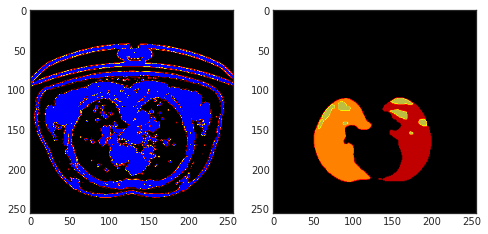

In [0]:
import matplotlib.colors
# Stolen from https://stackoverflow.com/questions/16834861/create-own-colormap-using-matplotlib-and-plot-color-scale 
norm=plt.Normalize(0,4) # 5 classes including BG
map_name = matplotlib.colors.LinearSegmentedColormap.from_list("", ["black", "red","yellow","blue"])

f, axarr = plt.subplots(1,2, figsize=(8,8))

# idx = 94 all classes

axarr[0].imshow(image, cmap=map_name, norm=norm)
axarr[1].imshow(gt, cmap=map_name, norm=norm)

(256, 256, 3) (256, 256, 4)


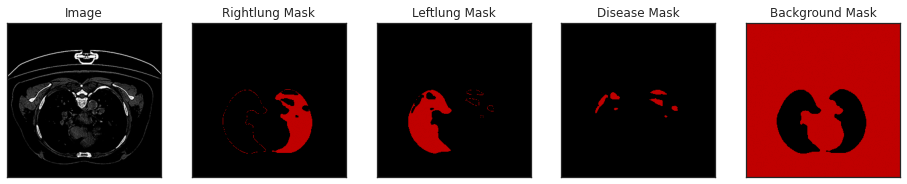

(256, 256, 3) (256, 256, 4)


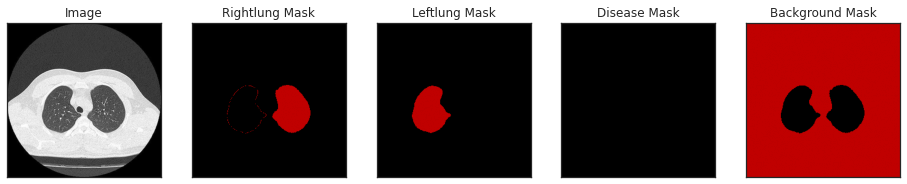

(256, 256, 3) (256, 256, 4)


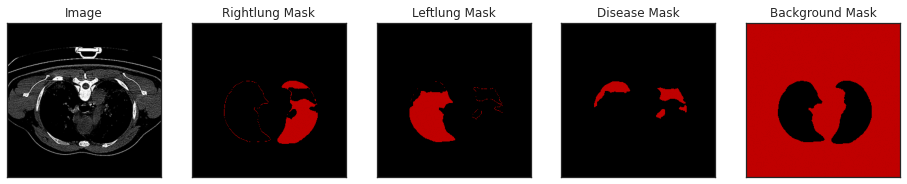

(256, 256, 3) (256, 256, 4)


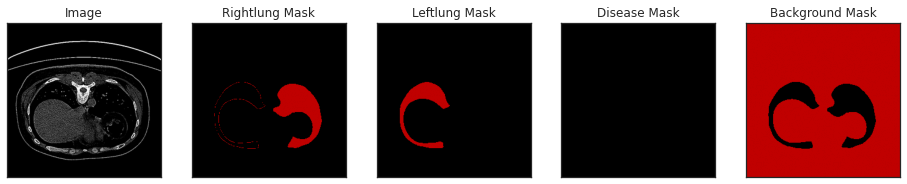

(256, 256, 3) (256, 256, 4)


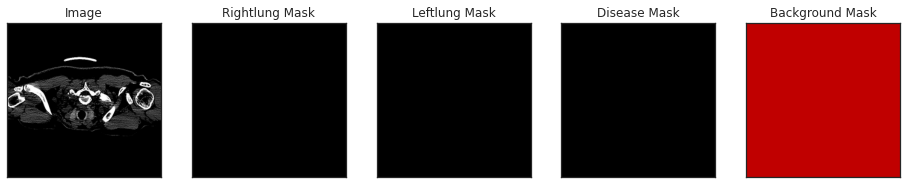

(256, 256, 3) (256, 256, 4)


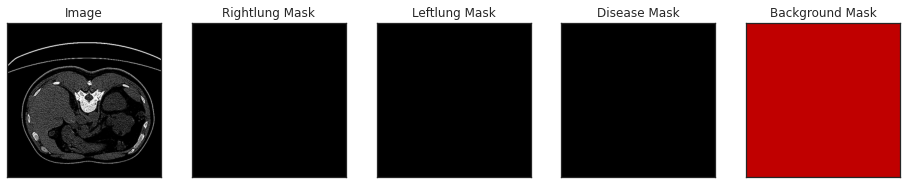

In [0]:
med= ['RightLung', 'LeftLung', 'Disease']

dataset = Dataset(x_train_dir, y_train_dir, classes=med)
image, mask = dataset[idx] 

print(image.shape, mask.shape)
visualize(
    image=image, 
    RightLung_mask = mask[..., 1].squeeze(),
    LeftLung_mask = mask[..., 2].squeeze(),
    Disease_mask = mask[..., 3].squeeze(),
    background_mask = mask[..., 0].squeeze(),
)

med= ['RightLung', 'LeftLung', 'Disease']

dataset = Dataset(x_train_dir, y_train_dir, classes=med)

for i in range(5):
    
    image, mask = dataset[random.randrange(len(dataset))] # get some sample
    print(image.shape, mask.shape)
    
    visualize(
    image=image, 
    RightLung_mask = mask[..., 1].squeeze(),
    LeftLung_mask = mask[..., 2].squeeze(),
    Disease_mask = mask[..., 3].squeeze(),
    background_mask = mask[..., 0].squeeze(),
    )

In [0]:
import albumentations as A

def round_clip_0_1(x, **kwargs):
    return x.round().clip(0, 1)

# define heavy augmentations
def get_training_augmentation():
    train_transform = [

        A.HorizontalFlip(p=0.5),

        A.ShiftScaleRotate(scale_limit=0.5, rotate_limit=0, shift_limit=0.1, p=1, border_mode=0),

        A.RandomCrop(height=patchsize, width=patchsize, always_apply=True), # patchsize instead of 320

        A.IAAAdditiveGaussianNoise(p=0.2),
    ]
    return A.Compose(train_transform)


def get_validation_augmentation():
    """Add paddings to make image shape divisible by 96"""
    test_transform = [
        A.PadIfNeeded(patchsize, patchsize)
    ]
    return A.Compose(test_transform)

def get_preprocessing(preprocessing_fn):
    """Construct preprocessing transform
    
    Args:
        preprocessing_fn (callbale): data normalization function 
            (can be specific for each pretrained neural network)
    Return:
        transform: albumentations.Compose
    
    """
    
    _transform = [
        A.Lambda(image=preprocessing_fn),
    ]
    return A.Compose(_transform)

(256, 256, 3) (256, 256, 4)


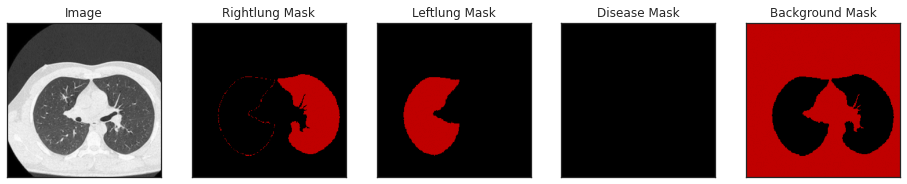

(256, 256, 3) (256, 256, 4)


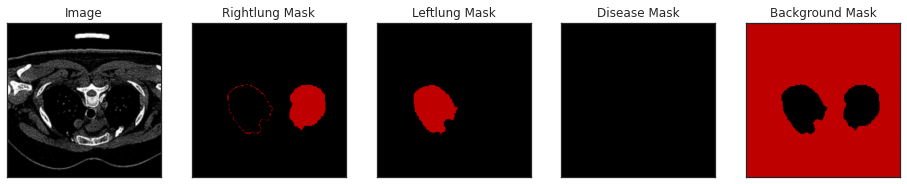

(256, 256, 3) (256, 256, 4)


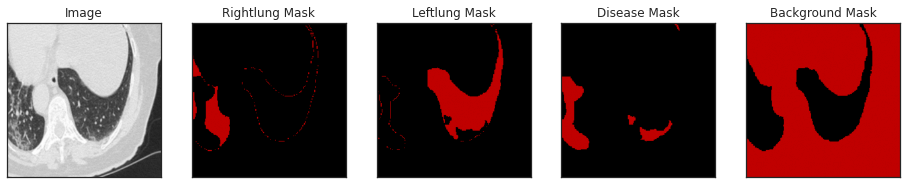

In [0]:
dataset = Dataset(x_train_dir, y_train_dir, classes=med, augmentation=get_training_augmentation())
for i in range(3):
    
    image, mask = dataset[random.randrange(len(dataset))] # get some sample
    print(image.shape, mask.shape)
    
    visualize(
    image=image, 
    RightLung_mask = mask[..., 1].squeeze(),
    LeftLung_mask = mask[..., 2].squeeze(),
    Disease_mask = mask[..., 3].squeeze(),
    background_mask = mask[..., 0].squeeze(),
    )

In [0]:
n_classes=4
CLASSES=med
# Dataset for train images
train_dataset = Dataset(
    x_train_dir, 
    y_train_dir, 
    classes=CLASSES,
)

# Dataset for validation images
valid_dataset = Dataset(
    x_valid_dir, 
    y_valid_dir, 
    classes=CLASSES ,
)

In [0]:
images,labels=dataset[0]
print(images.shape)
print(labels.shape)
BATCH_SIZE=16
train_dataloader = Dataloder(dataset, batch_size=BATCH_SIZE, shuffle=True)
images,labels=next(iter(train_dataloader))
print(images.shape)
print(labels.shape)
BATCH_SIZE=16
valid_dataloader = Dataloder(valid_dataset, batch_size=BATCH_SIZE, shuffle=True)
EPOCHS=20
# Test train loader
x , y = next(iter(valid_dataloader))
print(x.shape, y.shape)

(256, 256, 3)
(256, 256, 4)
(16, 256, 256, 3)
(16, 256, 256, 4)
(16, 256, 256, 3) (16, 256, 256, 4)


In [0]:
def dice_coef(y_true, y_pred, smooth=1):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def dice_loss(y_true, y_pred):
    smooth = 1.
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = y_true_f * y_pred_f
    score = (2. * K.sum(intersection) + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
    return 1. - score
def bce_dice_loss(y_true, y_pred):
    return categorical_crossentropy(y_true, y_pred) + dice_loss(y_true, y_pred)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:66: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 8)  224         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 128, 128, 8)  0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 128, 128, 8)  32          max_pooling2d_1[0][0]            
____________________________________________________________________________________________

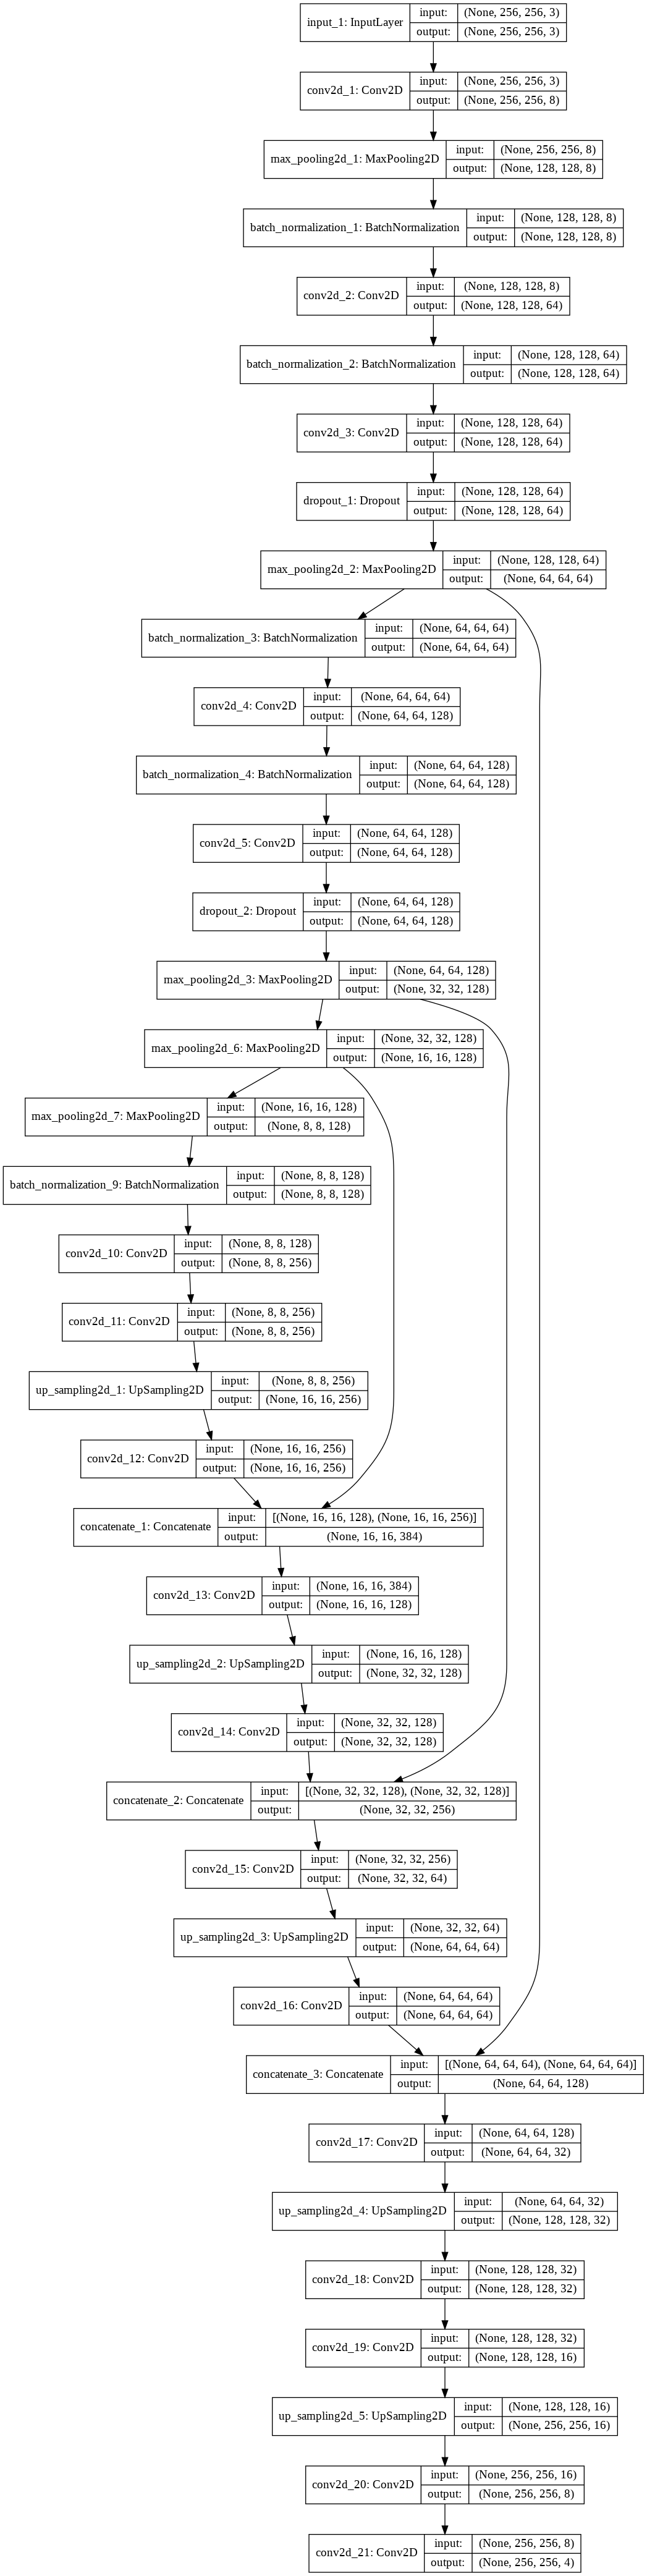

In [0]:
#Our model
def unet2(input_shape=(None, None, 3)):
    inputs = Input(input_shape)
    conv1 = Conv2D(8, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = BatchNormalization(momentum=0.99)(pool1)
    
    conv2 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv2)
    conv2 = BatchNormalization(momentum=0.99)(conv2)
    conv2 = Conv2D(64, 1, activation='relu', padding='same', kernel_initializer='he_normal')(conv2)
    conv2 = Dropout(0.02)(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)  
    conv3 = BatchNormalization(momentum=0.99)(pool2)

    conv3 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv3)
    conv3 = BatchNormalization(momentum=0.99)(conv3)
    conv3 = Conv2D(128, 1, activation='relu', padding='same', kernel_initializer='he_normal')(conv3)
    conv3 = Dropout(0.02)(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)  # 4
    conv4 = BatchNormalization(momentum=0.99)(pool3)

    conv4 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv4)
    conv4 = BatchNormalization(momentum=0.99)(conv4)
    conv4 = Conv2D(256, 1, activation='relu', padding='same', kernel_initializer='he_normal')(conv4)
    conv4 = Dropout(0.02)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)
 
    conv5 = BatchNormalization(momentum=0.99)(pool4)
    conv5 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv5)
    conv5 = BatchNormalization(momentum=0.99)(conv5)
    conv5 = Conv2D(512, 1, activation='relu', padding='same', kernel_initializer='he_normal')(conv5)
    conv5 = Dropout(0.02)(conv5)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(pool3)  
    pool5 = MaxPooling2D(pool_size=(2, 2))(pool4)  
 
    conv6 = BatchNormalization(momentum=0.99)(pool5)
    conv6 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv6)
 
    conv7 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv6)
    up7 = (UpSampling2D(size=(2, 2))(conv7))  # 2
    conv7 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(up7)
    merge7 = concatenate([pool4, conv7], axis=3)
 
    conv8 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge7)
    up8 = (UpSampling2D(size=(2, 2))(conv8))  # 4
    conv8 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(up8)
    merge8 = concatenate([pool3, conv8], axis=3)
 
    conv9 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge8)
    up9 = (UpSampling2D(size=(2, 2))(conv9))  # 8
    conv9 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(up9)
    merge9 = concatenate([pool2, conv9], axis=3)
 
    conv10 = Conv2D(32, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge9)
    up10 = (UpSampling2D(size=(2, 2))(conv10))  # 16
    conv10 = Conv2D(32, 3, activation='relu', padding='same', kernel_initializer='he_normal')(up10)
 
    conv11 = Conv2D(16, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv10)
    up11 = (UpSampling2D(size=(2, 2))(conv11))  # 32
    conv11 = Conv2D(8, 3, activation='relu', padding='same', kernel_initializer='he_normal')(up11)
 

    conv12 = Conv2D(4, 1, activation = 'softmax')(conv11)

    model = Model(input = inputs, output = conv12)
    
    model.compile(optimizer=Adam(lr=1e-5), loss=bce_dice_loss, metrics=[dice_coef])

    return model
K.clear_session()
model = unet2(input_shape=(256, 256, 3))
model.summary()
# plot model architecture
plot_model(model, show_shapes=True, to_file='unet2.png')

In [0]:
BATCH_SIZE = 16
CLASSES =['RightLung', 'LeftLung', 'Disease']
LR = 1e-4   # 1e-4(0.0001) 
EPOCHS = 20

# Define callbacks for learning rate scheduling, logging and best checkpoints saving
callbacks = [
    keras.callbacks.ModelCheckpoint('{}/{}.h5'.format(log_path, experiment_name), monitor='val_dice_coef', save_best_only=True, mode='max'),
    keras.callbacks.ReduceLROnPlateau(monitor='val_dice_coef', factor=0.1, verbose=1, patience=5, mode='max'), ## new_lr = lr * factor # 5
    keras.callbacks.EarlyStopping(monitor='val_dice_coef', min_delta=0, verbose=1, patience=15, mode='max', restore_best_weights=True), # 8
    keras.callbacks.CSVLogger('{}/training.csv'.format(log_path))
]

In [0]:
start_time = time.time()


history = model.fit_generator(
    train_dataloader, 
    steps_per_epoch=len(train_dataloader), 
    epochs=EPOCHS, 
    callbacks=callbacks, 
    validation_data=valid_dataloader, 
    validation_steps=len(valid_dataloader),  # val samples = batch size * no of steps
)

end_time = time.time()
print("--- Time taken to train : %s hours ---" % ((end_time - start_time)//3600))

Epoch 1/20
177/177 [==============================] - 3362s 19s/step - loss: 0.9915 - dice_coef: 0.6069 - val_loss: 0.7951 - val_dice_coef: 0.8472
Epoch 2/20
177/177 [==============================] - 66s 370ms/step - loss: 0.6321 - dice_coef: 0.7151 - val_loss: 0.5315 - val_dice_coef: 0.8919
Epoch 3/20
177/177 [==============================] - 66s 372ms/step - loss: 0.5353 - dice_coef: 0.7427 - val_loss: 0.4105 - val_dice_coef: 0.8903
Epoch 4/20
177/177 [==============================] - 67s 376ms/step - loss: 0.4957 - dice_coef: 0.7517 - val_loss: 0.3671 - val_dice_coef: 0.9046
Epoch 5/20
177/177 [==============================] - 66s 371ms/step - loss: 0.4604 - dice_coef: 0.7626 - val_loss: 0.3627 - val_dice_coef: 0.9127
Epoch 6/20
177/177 [==============================] - 65s 368ms/step - loss: 0.4568 - dice_coef: 0.7630 - val_loss: 0.3389 - val_dice_coef: 0.9096
Epoch 7/20
177/177 [==============================] - 66s 370ms/step - loss: 0.4419 - dice_coef: 0.7624 - val_loss: 0.

In [0]:
# save model weights
model.load_weights('{}/{}.h5'.format(log_path, experiment_name))

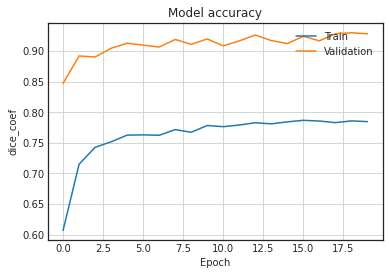

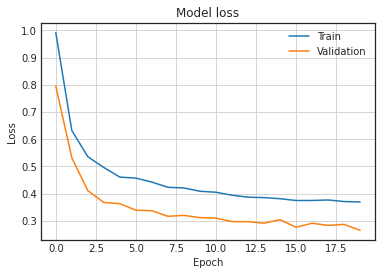

In [0]:
# # Plot training & validation accuracy values
plt.plot(history.history['dice_coef'])
plt.plot(history.history['val_dice_coef'])
plt.title('Model accuracy')
plt.ylabel('dice_coef')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.grid('on')
plt.show()

# # Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.grid('on')
plt.show()

In [0]:
# how to validate the model using test images and save predicted masks
import nibabel as nib
import cv2
import numpy as np
import os
import natsort
path1='datacovd19/test2' # path for loading test images
oslist=os.listdir(path1)
filesnew=natsort.natsorted(oslist)
print(filesnew)
path_savemask='datacovd19/test2/Predicted_Mask' # path for saving predicted mask
def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)                                  
import natsort
import matplotlib.pyplot as plt
import numpy as np
im_height=0
im_width=0
img_rows=256
img_cols=256
from tqdm import tqdm
for i, volume in enumerate(filesnew):
    #print(i)
    print(volume)
    cur_path = os.path.join(path1, volume)
    files=natsort.natsorted(os.listdir(cur_path))
    #train_ids = next(os.walk(path1+"images"))
    alist=[]
    #for n, id_ in tqdm(enumerate(files), total=len(files)):
    for n, id_ in tqdm(enumerate(files), total=10):
        print(n)
        print(id_)
        imgg=cv2.imread(os.path.join(cur_path,id_))
        image = np.expand_dims(imgg, axis=0)
        pr_mask = model.predict(image)  # predict labels from model, also check the prediction size
        pr_mask1 = np.argmax(pr_mask.squeeze(), axis=-1) # take the index of maximum probabilty for all class, this is output segmentation map
        #pr_mask1 = pr_mask.squeeze()
        #pr_mask1=pr_mask.squeeze()
        print("Uniques in label and predicted", np.unique(pr_mask1)) # check unique labels predicted by our model
        savpath=os.path.join(path_savemask,str(volume)) # save path 
        createFolder(savpath)
        cv2.imwrite(savpath+'/'+str(n)+'.png',pr_mask1) # save predicted mask in folders
        #img.save(savpath+'\\'+str(n)++ ".png")
        alist.append(pr_mask1)
print("Done!")

['Predicted_Mask', 'coronacases_009']
Predicted_Mask


  0%|          | 0/10 [00:00<?, ?it/s]


coronacases_009


  0%|          | 0/10 [00:00<?, ?it/s]

0
1.png


 10%|█         | 1/10 [00:01<00:12,  1.36s/it]

Uniques in label and predicted [0 1 2 3]
1
2.png


 20%|██        | 2/10 [00:01<00:08,  1.06s/it]

Uniques in label and predicted [0 1 2 3]
2
3.png


 30%|███       | 3/10 [00:02<00:06,  1.10it/s]

Uniques in label and predicted [0 1 2 3]
3
4.png


 40%|████      | 4/10 [00:02<00:04,  1.32it/s]

Uniques in label and predicted [0 1 2 3]
4
5.png


 50%|█████     | 5/10 [00:03<00:03,  1.44it/s]

Uniques in label and predicted [0 1 2 3]
5
6.png


 60%|██████    | 6/10 [00:03<00:02,  1.70it/s]

Uniques in label and predicted [0 1 2 3]
6
7.png


 70%|███████   | 7/10 [00:04<00:01,  1.81it/s]

Uniques in label and predicted [0 1 2 3]
7
8.png


 80%|████████  | 8/10 [00:04<00:01,  2.00it/s]

Uniques in label and predicted [0 1 2 3]
8
9.png


 90%|█████████ | 9/10 [00:04<00:00,  2.09it/s]

Uniques in label and predicted [0 1 2 3]
9
10.png


100%|██████████| 10/10 [00:05<00:00,  2.24it/s]

Uniques in label and predicted [0 1 2 3]
10
11.png


11it [00:05,  2.20it/s]                        

Uniques in label and predicted [0 1 2 3]
11
12.png


12it [00:06,  2.38it/s]

Uniques in label and predicted [0 1 2 3]
12
13.png


13it [00:06,  2.28it/s]

Uniques in label and predicted [0 1 2 3]
13
14.png


14it [00:06,  2.40it/s]

Uniques in label and predicted [0 1 2 3]
14
15.png


15it [00:07,  2.37it/s]

Uniques in label and predicted [0 1 2 3]
15
16.png


16it [00:07,  2.36it/s]

Uniques in label and predicted [0 1 2 3]
16
17.png


17it [00:08,  2.25it/s]

Uniques in label and predicted [0 1 2 3]
17
18.png


18it [00:08,  2.31it/s]

Uniques in label and predicted [0 1 2 3]
18
19.png


19it [00:09,  2.19it/s]

Uniques in label and predicted [0 1 2 3]
19
20.png


20it [00:09,  2.38it/s]

Uniques in label and predicted [0 1 2 3]
20
21.png


21it [00:10,  2.10it/s]

Uniques in label and predicted [0 1 2 3]
21
22.png


22it [00:10,  2.27it/s]

Uniques in label and predicted [0 1 2 3]
22
23.png


23it [00:11,  2.01it/s]

Uniques in label and predicted [0 1 2 3]
23
24.png


24it [00:11,  2.13it/s]

Uniques in label and predicted [0 1 2 3]
24
25.png


25it [00:11,  2.21it/s]

Uniques in label and predicted [0 1 2 3]
25
26.png


26it [00:12,  2.05it/s]

Uniques in label and predicted [0 1 2 3]
26
27.png


27it [00:12,  2.24it/s]

Uniques in label and predicted [0 1 2 3]
27
28.png


28it [00:13,  2.23it/s]

Uniques in label and predicted [0 1 2 3]
28
29.png


29it [00:13,  2.33it/s]

Uniques in label and predicted [0 1 2 3]
29
30.png


30it [00:14,  2.35it/s]

Uniques in label and predicted [0 1 2 3]
30
31.png


31it [00:14,  2.41it/s]

Uniques in label and predicted [0 1 2 3]
31
32.png


32it [00:14,  2.29it/s]

Uniques in label and predicted [0 1 2 3]
32
33.png


33it [00:15,  2.40it/s]

Uniques in label and predicted [0 1 2 3]
33
34.png


34it [00:15,  2.33it/s]

Uniques in label and predicted [0 1 2 3]
34
35.png


35it [00:16,  2.33it/s]

Uniques in label and predicted [0 1 2 3]
35
36.png


36it [00:16,  2.14it/s]

Uniques in label and predicted [0 1 2 3]
36
37.png


37it [00:17,  2.08it/s]

Uniques in label and predicted [0 1 2 3]
37
38.png


38it [00:17,  2.10it/s]

Uniques in label and predicted [0 1 2 3]
38
39.png


39it [00:18,  2.15it/s]

Uniques in label and predicted [0 1 2 3]
39
40.png


40it [00:18,  2.20it/s]

Uniques in label and predicted [0 1 2 3]
40
41.png


41it [00:19,  2.11it/s]

Uniques in label and predicted [0 1 2 3]
41
42.png


42it [00:19,  2.29it/s]

Uniques in label and predicted [0 1 2 3]
42
43.png


43it [00:19,  2.25it/s]

Uniques in label and predicted [0 1 2 3]
43
44.png


44it [00:20,  2.27it/s]

Uniques in label and predicted [0 1 2 3]
44
45.png


45it [00:20,  2.39it/s]

Uniques in label and predicted [0 1 2 3]
45
46.png


46it [00:21,  2.26it/s]

Uniques in label and predicted [0 1 2 3]
46
47.png


47it [00:21,  2.43it/s]

Uniques in label and predicted [0 1 2 3]
47
48.png


48it [00:22,  2.24it/s]

Uniques in label and predicted [0 1 2 3]
48
49.png


49it [00:22,  2.32it/s]

Uniques in label and predicted [0 1 2 3]
49
50.png


50it [00:23,  2.20it/s]

Uniques in label and predicted [0 1 2 3]
50
51.png


51it [00:23,  2.37it/s]

Uniques in label and predicted [0 1 2 3]
51
52.png


52it [00:23,  2.17it/s]

Uniques in label and predicted [0 1 2 3]
52
53.png


53it [00:24,  2.34it/s]

Uniques in label and predicted [0 1 2 3]
53
54.png


54it [00:24,  2.00it/s]

Uniques in label and predicted [0 1 2 3]
54
55.png


55it [00:25,  2.22it/s]

Uniques in label and predicted [0 1 2 3]
55
56.png


56it [00:26,  1.81it/s]

Uniques in label and predicted [0 1 2 3]
56
57.png


57it [00:26,  1.95it/s]

Uniques in label and predicted [0 1 2 3]
57
58.png


58it [00:26,  2.08it/s]

Uniques in label and predicted [0 1 2 3]
58
59.png


59it [00:27,  2.15it/s]

Uniques in label and predicted [0 1 2 3]
59
60.png


60it [00:27,  2.26it/s]

Uniques in label and predicted [0 1 2 3]
60
61.png


61it [00:28,  2.32it/s]

Uniques in label and predicted [0 1 2 3]
61
62.png


62it [00:28,  2.26it/s]

Uniques in label and predicted [0 1 2 3]
62
63.png


63it [00:28,  2.42it/s]

Uniques in label and predicted [0 1 2 3]
63
64.png


64it [00:29,  2.41it/s]

Uniques in label and predicted [0 1 2 3]
64
65.png


65it [00:29,  2.41it/s]

Uniques in label and predicted [0 1 2 3]
65
66.png


66it [00:30,  2.30it/s]

Uniques in label and predicted [0 1 2 3]
66
67.png


67it [00:30,  2.47it/s]

Uniques in label and predicted [0 1 2 3]
67
68.png


68it [00:31,  2.19it/s]

Uniques in label and predicted [0 1 2 3]
68
69.png


69it [00:31,  2.37it/s]

Uniques in label and predicted [0 1 2 3]
69
70.png


70it [00:31,  2.27it/s]

Uniques in label and predicted [0 1 2 3]
70
71.png


71it [00:32,  2.38it/s]

Uniques in label and predicted [0 1 2 3]
71
72.png


72it [00:32,  2.41it/s]

Uniques in label and predicted [0 1 2 3]
72
73.png


73it [00:33,  2.39it/s]

Uniques in label and predicted [0 1 2 3]
73
74.png


74it [00:33,  2.44it/s]

Uniques in label and predicted [0 1 2 3]
74
75.png


75it [00:34,  2.31it/s]

Uniques in label and predicted [0 1 2 3]
75
76.png


76it [00:34,  2.46it/s]

Uniques in label and predicted [0 1 2 3]
76
77.png


77it [00:34,  2.23it/s]

Uniques in label and predicted [0 1 2 3]
77
78.png


78it [00:35,  2.42it/s]

Uniques in label and predicted [0 1 2 3]
78
79.png


79it [00:35,  2.24it/s]

Uniques in label and predicted [0 1 2 3]
79
80.png


80it [00:36,  2.33it/s]

Uniques in label and predicted [0 1 2 3]
80
81.png


81it [00:36,  2.28it/s]

Uniques in label and predicted [0 1 2 3]
81
82.png


82it [00:37,  2.14it/s]

Uniques in label and predicted [0 1 2 3]
82
83.png


83it [00:37,  2.13it/s]

Uniques in label and predicted [0 1 2 3]
83
84.png


84it [00:38,  2.30it/s]

Uniques in label and predicted [0 1 2 3]
84
85.png


85it [00:38,  2.43it/s]

Uniques in label and predicted [0 1 2 3]
85
86.png


86it [00:38,  2.18it/s]

Uniques in label and predicted [0 1 2 3]
86
87.png


87it [00:39,  2.24it/s]

Uniques in label and predicted [0 1 2 3]
87
88.png


88it [00:39,  2.36it/s]

Uniques in label and predicted [0 1 2 3]
88
89.png


89it [00:40,  2.28it/s]

Uniques in label and predicted [0 1 2 3]
89
90.png


90it [00:40,  2.41it/s]

Uniques in label and predicted [0 1 2 3]
90
91.png


91it [00:41,  2.20it/s]

Uniques in label and predicted [0 1 2 3]
91
92.png


92it [00:41,  2.37it/s]

Uniques in label and predicted [0 1 2 3]
92
93.png


93it [00:41,  2.34it/s]

Uniques in label and predicted [0 1 2 3]
93
94.png


94it [00:42,  2.09it/s]

Uniques in label and predicted [0 1 2 3]
94
95.png


95it [00:42,  2.24it/s]

Uniques in label and predicted [0 1 2 3]
95
96.png


96it [00:43,  2.12it/s]

Uniques in label and predicted [0 1 2 3]
96
97.png


97it [00:43,  2.30it/s]

Uniques in label and predicted [0 1 2 3]
97
98.png


98it [00:44,  2.48it/s]

Uniques in label and predicted [0 1 2 3]
98
99.png


99it [00:44,  2.54it/s]

Uniques in label and predicted [0 1 2 3]
99
100.png


100it [00:44,  2.34it/s]

Uniques in label and predicted [0 1 2 3]
100
101.png


101it [00:45,  2.45it/s]

Uniques in label and predicted [0 1 2 3]
101
102.png


102it [00:45,  2.42it/s]

Uniques in label and predicted [0 1 2 3]
102
103.png


103it [00:46,  2.48it/s]

Uniques in label and predicted [0 1 2 3]
103
104.png


104it [00:46,  2.60it/s]

Uniques in label and predicted [0 1 2 3]
104
105.png


105it [00:46,  2.66it/s]

Uniques in label and predicted [0 1 2 3]
105
106.png


106it [00:47,  2.00it/s]

Uniques in label and predicted [0 1 2 3]
106
107.png


107it [00:47,  2.20it/s]

Uniques in label and predicted [0 1 2 3]
107
108.png


108it [00:48,  1.72it/s]

Uniques in label and predicted [0 1 2 3]
108
109.png


109it [00:49,  1.50it/s]

Uniques in label and predicted [0 1 2 3]
109
110.png


110it [00:50,  1.75it/s]

Uniques in label and predicted [0 1 2 3]
110
111.png


111it [00:50,  1.81it/s]

Uniques in label and predicted [0 1 2 3]
111
112.png


112it [00:50,  2.03it/s]

Uniques in label and predicted [0 1 2 3]
112
113.png


113it [00:51,  2.01it/s]

Uniques in label and predicted [0 1 2 3]
113
114.png


114it [00:51,  2.21it/s]

Uniques in label and predicted [0 1 2 3]
114
115.png


115it [00:52,  2.07it/s]

Uniques in label and predicted [0 1 2 3]
115
116.png


116it [00:52,  2.26it/s]

Uniques in label and predicted [0 1 2 3]
116
117.png


117it [00:53,  2.12it/s]

Uniques in label and predicted [0 1 2 3]
117
118.png


118it [00:53,  2.27it/s]

Uniques in label and predicted [0 1 2 3]
118
119.png


119it [00:54,  2.06it/s]

Uniques in label and predicted [0 1 2 3]
119
120.png


120it [00:54,  2.26it/s]

Uniques in label and predicted [0 1 2 3]
120
121.png


121it [00:54,  2.44it/s]

Uniques in label and predicted [0 1 2 3]
121
122.png


122it [00:55,  2.37it/s]

Uniques in label and predicted [0 1 2 3]
122
123.png


123it [00:55,  2.52it/s]

Uniques in label and predicted [0 1 2 3]
123
124.png


124it [00:55,  2.61it/s]

Uniques in label and predicted [0 1 2 3]
124
125.png


125it [00:56,  2.71it/s]

Uniques in label and predicted [0 1 2 3]
125
126.png


126it [00:56,  2.74it/s]

Uniques in label and predicted [0 1 2 3]
126
127.png


127it [00:57,  2.69it/s]

Uniques in label and predicted [0 1 2 3]
127
128.png


128it [00:57,  2.29it/s]

Uniques in label and predicted [0 1 2 3]
128
129.png


129it [00:59,  1.25it/s]

Uniques in label and predicted [0 1 2 3]
129
130.png


130it [00:59,  1.51it/s]

Uniques in label and predicted [0 1 2 3]
130
131.png


131it [00:59,  1.78it/s]

Uniques in label and predicted [0 1 2 3]
131
132.png


132it [01:00,  1.97it/s]

Uniques in label and predicted [0 1 2 3]
132
133.png


133it [01:00,  2.14it/s]

Uniques in label and predicted [0 1 2 3]
133
134.png


134it [01:01,  2.31it/s]

Uniques in label and predicted [0 1 2 3]
134
135.png


135it [01:01,  2.28it/s]

Uniques in label and predicted [0 1 2 3]
135
136.png


136it [01:02,  2.15it/s]

Uniques in label and predicted [0 1 2 3]
136
137.png


137it [01:02,  2.31it/s]

Uniques in label and predicted [0 1 2 3]
137
138.png


138it [01:02,  2.48it/s]

Uniques in label and predicted [0 1 2 3]
138
139.png


139it [01:03,  2.27it/s]

Uniques in label and predicted [0 1 2 3]
139
140.png


140it [01:03,  2.43it/s]

Uniques in label and predicted [0 1 2 3]
140
141.png


141it [01:03,  2.55it/s]

Uniques in label and predicted [0 1 2 3]
141
142.png


142it [01:04,  2.54it/s]

Uniques in label and predicted [0 1 2 3]
142
143.png


143it [01:04,  2.56it/s]

Uniques in label and predicted [0 1 2 3]
143
144.png


144it [01:05,  2.60it/s]

Uniques in label and predicted [0 1 2 3]
144
145.png


145it [01:05,  2.61it/s]

Uniques in label and predicted [0 1 2 3]
145
146.png


146it [01:05,  2.37it/s]

Uniques in label and predicted [0 1 2 3]
146
147.png


147it [01:06,  2.37it/s]

Uniques in label and predicted [0 1 2 3]
147
148.png


148it [01:06,  2.44it/s]

Uniques in label and predicted [0 1 2]
148
149.png


149it [01:07,  2.53it/s]

Uniques in label and predicted [0 1 2]
149
150.png


150it [01:07,  2.47it/s]

Uniques in label and predicted [0 1 2]
150
151.png


151it [01:08,  2.05it/s]

Uniques in label and predicted [0 1 2 3]
151
152.png


152it [01:08,  2.21it/s]

Uniques in label and predicted [0 1 2 3]
152
153.png


153it [01:09,  2.08it/s]

Uniques in label and predicted [0 1 2 3]
153
154.png


154it [01:09,  2.18it/s]

Uniques in label and predicted [0 1 2 3]
154
155.png


155it [01:10,  2.17it/s]

Uniques in label and predicted [0 1 2 3]
155
156.png


156it [01:10,  2.31it/s]

Uniques in label and predicted [0 1 2 3]
156
157.png


157it [01:10,  2.22it/s]

Uniques in label and predicted [0 1 2 3]
157
158.png


158it [01:11,  2.36it/s]

Uniques in label and predicted [0 1 2 3]
158
159.png


159it [01:11,  2.33it/s]

Uniques in label and predicted [0 1 2 3]
159
160.png


160it [01:12,  2.26it/s]

Uniques in label and predicted [0 1 2 3]
160
161.png


161it [01:12,  2.33it/s]

Uniques in label and predicted [0 1 2 3]
161
162.png


162it [01:12,  2.40it/s]

Uniques in label and predicted [0 1 2 3]
162
163.png


163it [01:13,  2.28it/s]

Uniques in label and predicted [0 1 2 3]
163
164.png


164it [01:13,  2.28it/s]

Uniques in label and predicted [0 1 2 3]
164
165.png


165it [01:14,  2.43it/s]

Uniques in label and predicted [0 1 2 3]
165
166.png


166it [01:14,  2.48it/s]

Uniques in label and predicted [0 1 2 3]
166
167.png


167it [01:15,  2.41it/s]

Uniques in label and predicted [0 1 2 3]
167
168.png


168it [01:15,  2.49it/s]

Uniques in label and predicted [0 1 2 3]
168
169.png


169it [01:15,  2.32it/s]

Uniques in label and predicted [0 1 2 3]
169
170.png


170it [01:16,  2.33it/s]

Uniques in label and predicted [0 1 2 3]
170
171.png


171it [01:16,  2.17it/s]

Uniques in label and predicted [0 1 2 3]
171
172.png


172it [01:17,  2.13it/s]

Uniques in label and predicted [0 2 3]
172
173.png


173it [01:17,  2.32it/s]

Uniques in label and predicted [0 3]
173
174.png


174it [01:18,  2.36it/s]

Uniques in label and predicted [0 1 2 3]
174
175.png


175it [01:18,  2.44it/s]

Uniques in label and predicted [0 1 2 3]
175
176.png


176it [01:18,  2.54it/s]

Uniques in label and predicted [0 1 2 3]
176
177.png


177it [01:19,  2.47it/s]

Uniques in label and predicted [0 1 2 3]
177
178.png


178it [01:19,  2.33it/s]

Uniques in label and predicted [0 1 2 3]
178
179.png


179it [01:20,  2.16it/s]

Uniques in label and predicted [0 1 2 3]
179
180.png


180it [01:20,  2.32it/s]

Uniques in label and predicted [0 1 2 3]
180
181.png


181it [01:21,  2.45it/s]

Uniques in label and predicted [0 1 2 3]
181
182.png


182it [01:21,  2.36it/s]

Uniques in label and predicted [0 1 2 3]
182
183.png


183it [01:21,  2.40it/s]

Uniques in label and predicted [0 1 2 3]
183
184.png


184it [01:22,  2.46it/s]

Uniques in label and predicted [0 1 2 3]
184
185.png


185it [01:22,  2.46it/s]

Uniques in label and predicted [0 1 2 3]
185
186.png


186it [01:23,  2.54it/s]

Uniques in label and predicted [0 1 2 3]
186
187.png


187it [01:23,  2.68it/s]

Uniques in label and predicted [0 1 2 3]
187
188.png


188it [01:23,  2.73it/s]

Uniques in label and predicted [0 1 2 3]
188
189.png


189it [01:24,  2.75it/s]

Uniques in label and predicted [0 1 2 3]
189
190.png


190it [01:24,  2.59it/s]

Uniques in label and predicted [0 1 2 3]
190
191.png


191it [01:25,  2.33it/s]

Uniques in label and predicted [0 1 2 3]
191
192.png


192it [01:25,  2.48it/s]

Uniques in label and predicted [0 1 2 3]
192
193.png


193it [01:25,  2.20it/s]

Uniques in label and predicted [0 1 2 3]
193
194.png


194it [01:26,  2.35it/s]

Uniques in label and predicted [0 1 2 3]
194
195.png


195it [01:26,  2.39it/s]

Uniques in label and predicted [0 1 2 3]
195
196.png


196it [01:27,  2.45it/s]

Uniques in label and predicted [0 1 2 3]
196
197.png


197it [01:27,  2.05it/s]

Uniques in label and predicted [0 1 2 3]
197
198.png


198it [01:28,  2.22it/s]

Uniques in label and predicted [0 1 2 3]
198
199.png


199it [01:28,  2.38it/s]

Uniques in label and predicted [0 1 2 3]
199
200.png


200it [01:28,  2.48it/s]

Uniques in label and predicted [0 1 2 3]
200
201.png


201it [01:29,  2.55it/s]

Uniques in label and predicted [0 1 2 3]
201
202.png


202it [01:29,  2.64it/s]

Uniques in label and predicted [0 1 2 3]
202
203.png


203it [01:29,  2.63it/s]

Uniques in label and predicted [0 1 2 3]
203
204.png


204it [01:30,  2.43it/s]

Uniques in label and predicted [0 1 2 3]
204
205.png


205it [01:30,  2.58it/s]

Uniques in label and predicted [0 1 2 3]
205
206.png


206it [01:31,  2.57it/s]

Uniques in label and predicted [0 1 2 3]
206
207.png


207it [01:31,  2.60it/s]

Uniques in label and predicted [0 1 2 3]
207
208.png


208it [01:32,  2.33it/s]

Uniques in label and predicted [0 1 2 3]
208
209.png


209it [01:32,  2.47it/s]

Uniques in label and predicted [0 1 2 3]
209
210.png


210it [01:32,  2.47it/s]

Uniques in label and predicted [0 1 2 3]
210
211.png


211it [01:33,  2.50it/s]

Uniques in label and predicted [0 1 2 3]
211
212.png


212it [01:33,  2.51it/s]

Uniques in label and predicted [0 1 2 3]
212
213.png


213it [01:34,  2.53it/s]

Uniques in label and predicted [0 1 2 3]
213
214.png


214it [01:34,  2.60it/s]

Uniques in label and predicted [0 1 2 3]
214
215.png


215it [01:34,  2.63it/s]

Uniques in label and predicted [0 1 2 3]
215
216.png


216it [01:35,  2.59it/s]

Uniques in label and predicted [0 1 2 3]
216
217.png


217it [01:35,  2.33it/s]

Uniques in label and predicted [0 1 2 3]
217
218.png


218it [01:36,  2.50it/s]

Uniques in label and predicted [0 1 2 3]
218
219.png


219it [01:36,  2.28it/s]

Uniques in label and predicted [0 1 2 3]
219
220.png


220it [01:37,  2.14it/s]

Uniques in label and predicted [0 1 2 3]
220
221.png


221it [01:37,  2.30it/s]

Uniques in label and predicted [0 1 2 3]
221
222.png


222it [01:37,  2.48it/s]

Uniques in label and predicted [0 1 2 3]
222
223.png


223it [01:38,  2.30it/s]

Uniques in label and predicted [0 1 2 3]
223
224.png


224it [01:38,  2.40it/s]

Uniques in label and predicted [0 1 2 3]
224
225.png


225it [01:39,  2.34it/s]

Uniques in label and predicted [0 1 2 3]
225
226.png


226it [01:39,  2.40it/s]

Uniques in label and predicted [0 1 2 3]
226
227.png


227it [01:39,  2.38it/s]

Uniques in label and predicted [0 1 2 3]
227
228.png


228it [01:40,  2.44it/s]

Uniques in label and predicted [0 1 2 3]
228
229.png


229it [01:41,  1.98it/s]

Uniques in label and predicted [0 1 2 3]
229
230.png


230it [01:41,  1.76it/s]

Uniques in label and predicted [0 1 2 3]
230
231.png


231it [01:42,  2.01it/s]

Uniques in label and predicted [0 1 2 3]
231
232.png


232it [01:42,  2.15it/s]

Uniques in label and predicted [0 1 2 3]
232
233.png


233it [01:42,  2.32it/s]

Uniques in label and predicted [0 1 2 3]
233
234.png


234it [01:43,  2.25it/s]

Uniques in label and predicted [0 1 2 3]
234
235.png


235it [01:43,  2.22it/s]

Uniques in label and predicted [0 1 2 3]
235
236.png


236it [01:44,  2.38it/s]

Uniques in label and predicted [0 1 2 3]
236
237.png


237it [01:44,  2.50it/s]

Uniques in label and predicted [0 1 2 3]
237
238.png


238it [01:44,  2.50it/s]

Uniques in label and predicted [0 1 2 3]
238
239.png


239it [01:45,  2.29it/s]

Uniques in label and predicted [0 1 2 3]
239
240.png


240it [01:45,  2.38it/s]

Uniques in label and predicted [0 1 2 3]
240
241.png


241it [01:46,  2.46it/s]

Uniques in label and predicted [0 1 2 3]
241
242.png


242it [01:46,  2.53it/s]

Uniques in label and predicted [0 1 2 3]
242
243.png


243it [01:46,  2.54it/s]

Uniques in label and predicted [0 1 2 3]
243
244.png


244it [01:47,  2.61it/s]

Uniques in label and predicted [0 1 2 3]
244
245.png


245it [01:47,  2.67it/s]

Uniques in label and predicted [0 1 2 3]
245
246.png


246it [01:47,  2.73it/s]

Uniques in label and predicted [0 1 2 3]
246
247.png


247it [01:48,  2.01it/s]

Uniques in label and predicted [0 1 2 3]
247
248.png


248it [01:49,  2.04it/s]

Uniques in label and predicted [0 1 2 3]
248
249.png


249it [01:49,  2.03it/s]

Uniques in label and predicted [0 1 2 3]
249
250.png


250it [01:50,  1.99it/s]

Uniques in label and predicted [0 1 2 3]
250
251.png


251it [01:50,  1.89it/s]

Uniques in label and predicted [0 1 2 3]
251
252.png


252it [01:51,  1.82it/s]

Uniques in label and predicted [0 1 2 3]
252
253.png


253it [01:51,  1.89it/s]

Uniques in label and predicted [0 1 2 3]
253
254.png


254it [01:52,  1.96it/s]

Uniques in label and predicted [0 1 2 3]
254
255.png


255it [01:52,  2.13it/s]

Uniques in label and predicted [0 1 2 3]
255
256.png


256it [01:53,  2.26it/s]

Uniques in label and predicted [0 1 2 3]
Done!


In [0]:
def Performance_Metrics(y_true, y_pred):
    ''' 
    The Dice similarity coefficient (DSC) is a statistical validation metric for the image
    segmentations and determines the spatial overlap accuracy of the segmentation. It also 
    same as F1-score. 
    
    The Intersection over Union (IoU) also referred to as the Jaccard index (JI), is essentially
    a method to quantify the percent overlap between the GT mask and prediction output.
    This metric is closely related to the DSC. The IoU metric measures the number of pixels
    common between the target and prediction masks divided by the total number of pixels present
    across both masks.
    
    Mathematically, they are related as follows:
    IoU = DSC/(2-DSC) or DSC = 2*IoU/(IoU+1)
    
    The Sensitivity also called the true positive rate, the recall, or probability of detection that 
    measures the proportion of actual positives that are correctly identified as such class 
    (e.g., the percentage of sick people who are correctly identified as having the condition).
    
    The Specificity also called the true negative rate measures the proportion of actual negatives that
    are correctly identified as such class. (e.g., the percentage of healthy people who are correctly
    identified as not having the condition).
    
  
    Input Arguments: 
        y_true: True Labels of the 2D images so called ground truth (GT).
        y_pred: Predicted Labels of the 2D images so called Predicted/ segmented Mask.
        
    Output Arguments: 
        dsc: The DSC between y_true and y_pred
        iou: The IoU between y_true and y_pred
        accuracy: The accuracy of pixels clasification.
        sensitivity: The accuracy of foreground pixels clasification.
        specificity: The accuracy of background pixels clasification.
        balancedAccuracy: The balanced accuracy of both foreground & background pixels clasification.

    '''
    if y_true.shape != y_pred.shape:
        raise ValueError("Shape mismatch!! y_true and y_pred must have the same shape.")

    y_true_f = (y_true/y_true.max()).flatten()
    y_pred_f = (y_pred/y_pred.max()).flatten()
    
    intersection = np.sum(y_true_f * y_pred_f)
    
    dsc = (2. * intersection ) / (np.sum(y_true_f) + np.sum(y_pred_f))
    iou = (intersection) / (np.sum(y_true_f) + np.sum(y_pred_f)-intersection)
    
    y_true = np.asarray(y_true).astype(np.bool)
    y_pred = np.asarray(y_pred).astype(np.bool)

        
    y_true=y_true.flatten()
    y_pred=y_pred.flatten()
    
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    accuracy = (tn+tp)/(tn+fp+fn+tp)
    sensitivity = (tp)/(fn+tp)
    specificity = (tn)/(tn+fp)
    balancedAccuracy = (sensitivity+specificity)/2

    
    return dsc, iou, accuracy, sensitivity, specificity, balancedAccuracy

In [0]:
# prediction on test images

testImagePath =CurrentDirectory+"/testimages/"
imagePath = glob.glob(testImagePath+"*.jpg")
imagePath.sort()
print(len(imagePath))

GTPath= CurrentDirectory+"/Test_GT_/"
GT = glob.glob(GTPath+"*.png")
GT.sort()
print(len(GT))


MaskSavePath= CurrentDirectory+'/Mask/'

model = model # your model

model.load_weights("exp-1.hdf5")

for imageName,gt in zip(imagePath,GT):
    img = cv2.imread(imageName,-1)
    imgcopy=img.copy()
    filename, file_extension = os.path.splitext(imageName) 
    
    img=cv2.resize(img,(width,height))
    img=img.astype(np.float32)
    img = img/img.max()
    img=np.expand_dims(img, axis=0)
    Prediction=model.predict(img,verbose=0)
    
    mask=Prediction.reshape(height,width)
    mask=(255*(mask/mask.max())).astype('uint8')
    cv2.imwrite(MaskSavePath+filename[-12:]+'.png',mask)